In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

sns.set()

In [3]:
data_train = pd.read_excel("E-Commerce_train.xlsx")
data_test = pd.read_excel("E-Commerce_test.xlsx")

data_train.drop(columns="ID", inplace=True)

In [4]:
data_train["Warehouse_block"].replace({"A":0, "B":1, "C":2,"D":3, "F": 4}, inplace=True)
data_train["Mode_of_Shipment"].replace({"Flight":0, "Ship":1, "Road":2},inplace= True)
data_train["Product_importance"].replace({"low":0, "medium":1,"high":2},inplace= True)
data_train["Gender"].replace({"F":0, "M":1},inplace= True)

In [5]:
data_test["Warehouse_block"].replace({"A":0, "B":1, "C":2,"D":3, "F": 4}, inplace=True)
data_test["Mode_of_Shipment"].replace({"Flight":0, "Ship":1, "Road":2},inplace= True)
data_test["Product_importance"].replace({"low":0, "medium":1,"high":2},inplace= True)
data_test["Gender"].replace({"F":0, "M":1},inplace= True)

In [6]:
X = data_train[["Warehouse_block","Mode_of_Shipment","Customer_care_calls","Customer_rating","Prior_purchases","Product_importance","Gender","Weight_in_gms","Cost_of_the_Product","Discount_offered"]]
y = data_train["Reached.on.Time_Y.N"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=60, stratify=y)

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [9]:
param_grid = {'min_samples_split':np.arange(1,10),
              'min_samples_leaf': range(1,5),
              'criterion': ['gini', 'entropy'], 
              'max_depth':[2,4,6,8,10,12],}

In [18]:
tree = DecisionTreeClassifier()
model = GridSearchCV(tree, param_grid= param_grid , cv=5)
model.fit(X_train, y_train)

C:\Users\gomez\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
240 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\gomez\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gomez\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py", line 969, in fit
    super().fit(
  File "C:\Users\gomez\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py", line 265, in fit
    check_scalar(
  File "C

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [19]:
print("Mejores hiperparámetros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

scores = pd.DataFrame(model.cv_results_)
scores.head(3)

Mejores hiperparámetros: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 6}
Mejor Score: 0.7095938660505265



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001499,0.000003,0.000000,0.000000,gini,2,1,1,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,432
1,0.004001,0.000315,0.001299,0.000246,gini,2,1,2,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.712346,0.714198,0.725926,0.692593,0.684991,0.70601,0.015004,120
2,0.003900,0.000374,0.000899,0.000374,gini,2,1,3,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.712346,0.714198,0.725926,0.692593,0.684991,0.70601,0.015004,120


In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
param_grid = {'n_neighbors':np.arange(1, 20),
              'weights': ['uniform', 'distance'], 
              'leaf_size':[1,2,3,4,5,6,7,8,9],
              'algorithm':['auto', 'kd_tree']}

In [22]:
knn = KNeighborsClassifier()
model = GridSearchCV(knn, param_grid= param_grid , cv=5)
model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'kd_tree'],
                         'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'weights': ['uniform', 'distance']})

In [23]:
print("Mejores hiperparámetros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

scores = pd.DataFrame(model.cv_results_)
scores.head(3)

Mejores hiperparámetros: {'algorithm': 'auto', 'leaf_size': 7, 'n_neighbors': 18, 'weights': 'uniform'}
Mejor Score: 0.6919364948642279



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_leaf_size,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.026000,0.000316,0.0350,0.000316,auto,1,1,uniform,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.692593,0.664198,0.67963,0.672840,0.676343,0.677121,0.009291,613
1,0.025599,0.000200,0.0078,0.000246,auto,1,1,distance,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.692593,0.664198,0.67963,0.672840,0.676343,0.677121,0.009291,613
2,0.025500,0.000001,0.0369,0.000201,auto,1,2,uniform,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.693827,0.697531,0.69321,0.683951,0.684373,0.690578,0.005445,45


In [10]:
from sklearn.svm import SVC

In [63]:
#Mejores hiperparámetros: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 5}
#Mejor Score: 0.7095936372856283

tree = DecisionTreeClassifier(max_depth=8,criterion='entropy',min_samples_leaf=3, min_samples_split=5)

#Mejores hiperparámetros: {'algorithm': 'auto', 'leaf_size': 7, 'n_neighbors': 18, 'weights': 'uniform'}
#Mejor Score: 0.6919364948642279
knn = KNeighborsClassifier(algorithm='auto', leaf_size=7, n_neighbors=18, weights='uniform')


#Mejores hiperparámetros: {'C': 2, 'gamma': 'auto', 'kernel': 'rbf'}
#Mejor Score: 0.638967930509242
svm = SVC()


In [64]:
tree.fit(X_train,y_train)
knn.fit(X_train,y_train)
svm.fit(X_train,y_train)

SVC()

In [66]:
# Predecimos sobre nuestro set de entrenamiento

y_train_pred = tree.predict(X_train)

# Predecimos sobre nuestro set de test

y_test_pred = tree.predict(X_test)

# Comparamos con las etiquetas reales

print('Accuracy sobre conjunto de Train:', accuracy_score(y_train_pred,y_train))
print('Accuracy sobre conjunto de Test:', accuracy_score(y_test_pred,y_test))

Accuracy sobre conjunto de Train: 0.7276206939128288
Accuracy sobre conjunto de Test: 0.7088888888888889


In [58]:
# Predecimos sobre nuestro set de entrenamiento

y_train_pred = knn.predict(X_train)

# Predecimos sobre nuestro set de test

y_test_pred = knn.predict(X_test)

# Comparamos con las etiquetas reales

print('Accuracy sobre conjunto de Train:', accuracy_score(y_train_pred,y_train))
print('Accuracy sobre conjunto de Test:', accuracy_score(y_test_pred,y_test))

Accuracy sobre conjunto de Train: 0.7370045684652426
Accuracy sobre conjunto de Test: 0.7133333333333334


In [65]:
# Predecimos sobre nuestro set de entrenamiento

y_train_pred = svm.predict(X_train)

# Predecimos sobre nuestro set de test

y_test_pred = svm.predict(X_test)

# Comparamos con las etiquetas reales

print('Accuracy sobre conjunto de Train:', accuracy_score(y_train_pred,y_train))
print('Accuracy sobre conjunto de Test:', accuracy_score(y_test_pred,y_test))

Accuracy sobre conjunto de Train: 0.693171996542783
Accuracy sobre conjunto de Test: 0.6877777777777778


In [14]:
import xgboost as xgb
import sklearn.metrics as metrics


In [71]:
#{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 5}

clf_xgb = xgb.XGBClassifier(n_estimators=150, use_label_encoder= False, )

clf_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=150,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [72]:
# Predecimos

y_train_pred = clf_xgb.predict(X_train)
y_test_pred = clf_xgb.predict(X_test)

# Evaluamos
print('Accuracy en train:', metrics.accuracy_score(y_train, y_train_pred))
print('Accuracy en test:', metrics.accuracy_score(y_test, y_test_pred))

Accuracy en train: 0.9592542289171503
Accuracy en test: 0.6711111111111111


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier # Modelo 1
from sklearn.svm import SVC # Modelo 2
from sklearn.tree import DecisionTreeClassifier # Modelo 3

from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression # Metamodelo

In [143]:
#Mejores hiperparámetros: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 5}
#Mejor Score: 0.7095936372856283

tree = DecisionTreeClassifier(max_depth=8,criterion='entropy',min_samples_leaf=3, min_samples_split=5)

#Mejores hiperparámetros: {'algorithm': 'auto', 'leaf_size': 7, 'n_neighbors': 18, 'weights': 'uniform'}
#Mejor Score: 0.6919364948642279
knn = KNeighborsClassifier(algorithm='auto', leaf_size=7, n_neighbors=18, weights='uniform')


#Mejores hiperparámetros: {'C': 2, 'gamma': 'auto', 'kernel': 'rbf'}
#Mejor Score: 0.638967930509242
svm = SVC()


clf_xgb = xgb.XGBClassifier(n_estimators=150, use_label_encoder= False)


In [144]:
estimator_list = [
    ('knn',knn),
    ('svm', svm),
    ('tree',tree)]


In [145]:
stack_model = StackingClassifier(
    estimator_list, final_estimator = LogisticRegression()
)
stack_model.fit(X_train,y_train)

StackingClassifier(estimators=[('knn',
                                KNeighborsClassifier(leaf_size=7,
                                                     n_neighbors=18)),
                               ('svm', SVC()),
                               ('tree',
                                DecisionTreeClassifier(criterion='entropy',
                                                       max_depth=8,
                                                       min_samples_leaf=3,
                                                       min_samples_split=5))],
                   final_estimator=LogisticRegression())

In [146]:
y_train_pred = stack_model.predict(X_train)
y_test_pred = stack_model.predict(X_test)

# Desempeño del metamodelo en train, calculando la precisión (accuracy)
stack_model_train_accuracy = accuracy_score(y_train, y_train_pred)

# Desempeño del metamodelo en test, calculando la precisión (accuracy)
stack_model_test_accuracy = accuracy_score(y_test, y_test_pred)

print('Desempeño del metamodelo para el Training set: ',stack_model_train_accuracy)
print('Desempeño del metamodelo para el Test set: ',stack_model_test_accuracy)

Desempeño del metamodelo para el Training set:  0.7447833065810594
Desempeño del metamodelo para el Test set:  0.6988888888888889


In [10]:
from sklearn.ensemble import BaggingClassifier

In [15]:
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=8,criterion='entropy',min_samples_leaf=3, min_samples_split=5), bootstrap_features=False, n_estimators= 150, n_jobs = -1)
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.accuracy_score(y_test, y_test_pred))

0.7523151006297074
0.7055555555555556


In [184]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_train, y_train_pred)

In [185]:
matrix

array([[2843,  109],
       [1918, 3229]], dtype=int64)

In [186]:
from sklearn.metrics import ConfusionMatrixDisplay

cm_display = ConfusionMatrixDisplay(matrix)

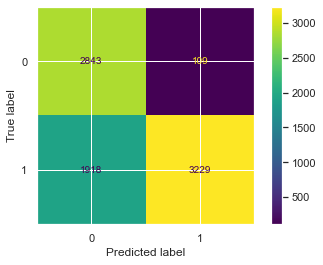

In [188]:
cm_display = ConfusionMatrixDisplay(matrix)
cm_display.plot()
plt.show()

In [189]:
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_test_pred)
print(exactitud)

0.7055555555555556


In [190]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_test_pred, average= None)
print(precision)


[0.56       0.90933333]


In [191]:
from sklearn.metrics import recall_score

precision = recall_score(y_test, y_test_pred, average= None)
print(precision)

[0.89634146 0.59615385]


In [16]:
data_test

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,9000,4,1,5,1,189,2,1,1,10,5248
1,9001,3,1,5,3,150,2,2,0,9,4446
2,9002,4,1,3,3,200,3,0,1,3,5739
3,9003,0,1,5,1,133,2,1,1,1,4643
4,9004,1,1,4,2,260,3,0,1,4,5504
...,...,...,...,...,...,...,...,...,...,...,...
1995,10995,0,1,4,1,252,5,1,0,1,1538
1996,10996,1,1,4,1,232,5,1,0,6,1247
1997,10997,2,1,5,4,242,5,0,0,4,1155
1998,10998,4,1,5,2,223,6,1,1,2,1210


In [19]:
data_test

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,9000,4,1,5,1,189,2,1,1,10,5248
1,9001,3,1,5,3,150,2,2,0,9,4446
2,9002,4,1,3,3,200,3,0,1,3,5739
3,9003,0,1,5,1,133,2,1,1,1,4643
4,9004,1,1,4,2,260,3,0,1,4,5504
...,...,...,...,...,...,...,...,...,...,...,...
1995,10995,0,1,4,1,252,5,1,0,1,1538
1996,10996,1,1,4,1,232,5,1,0,6,1247
1997,10997,2,1,5,4,242,5,0,0,4,1155
1998,10998,4,1,5,2,223,6,1,1,2,1210


In [25]:
data_test2 =data_test2[["Warehouse_block","Mode_of_Shipment","Customer_care_calls","Customer_rating","Prior_purchases","Product_importance","Gender","Weight_in_gms","Cost_of_the_Product","Discount_offered"]]

In [ ]:
data_train[["Warehouse_block","Mode_of_Shipment","Customer_care_calls","Customer_rating","Prior_purchases","Product_importance","Gender","Weight_in_gms","Cost_of_the_Product","Discount_offered"]]

In [26]:
y_test_pred = clf.predict(data_test2)

In [27]:
y_test_pred

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [30]:
serie = pd.Series(y_test_pred)

In [32]:
respuestas = pd.DataFrame(serie)

In [1]:
respuestas.rename(columns={'0':'pred'},inplace=True)

NameError: name 'respuestas' is not defined

In [41]:
respuestas.to_csv("predicciones.csv")

In [42]:
respuestas = respuestas.drop

,pred
0,0
1,0
2,0
3,0
4,0
...,...
1995,1
1996,0
1997,0
1998,1


In [43]:
respuestas.drop(columns='',inplace=True)

KeyError: "[''] not found in axis"

In [29]:
from sklearn.metrics import recall_score

precision = recall_score(y_test_pred, average= None)
print(precision)

TypeError: recall_score() missing 1 required positional argument: 'y_pred'